In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import sys
import tkinter as tk
from tkinter import filedialog
sys.path.append("../")

from utils.preprocessing import *

In [7]:
pose_csv = '/Users/kaycei/K on Server (NoMachine)/KayCei/HDC/AH1-KO/012924- Tube/30fps.csv'
pose_df = pd.read_csv(pose_csv, header=[0, 1, 2], index_col=0)
pose = np.array([pose_df.iloc[:, c] for c in np.arange(pose_df.shape[1]) if not np.mod(c, 3)==2]).T
print(pose.shape)

(119388, 12)


In [8]:
save_path = os.path.dirname(pose_csv)  # Get the directory of pose_csv
%store save_path
print(save_path)

Stored 'save_path' (str)
/Users/kaycei/K on Server (NoMachine)/KayCei/HDC/AH1-KO/012924- Tube


### original data table

In [9]:
pose_df[::3].head(40)

scorer    DLC_resnet50_bottomup_clearSep21shuffle1_1030000              \
bodyparts                                            snout               
coords                                                   x           y   
0                                              1090.359863   70.500267   
6                                              1090.627563   68.073112   
12                                             1090.136230   71.732086   
18                                             1091.365601   68.606094   
24                                              877.332886   62.810909   
30                                              880.436829   49.777866   
36                                              872.447083   41.356823   
42                                              882.254333   37.100609   
48                                              901.244629   37.867306   
54                                              901.204956   37.884308   
60                                              901.208496   37.919342   
66                                              861.166321   45.519199   
72                                              832.384094   40.960918   
78                                              811.687439   51.157272   
84                                              787.777893   63.174503   
90                                              764.299194   56.333435   
96                                              745.535645   52.588699   
102                                             733.617432   44.406548   
108                                             733.197205   38.782570   
114                                             737.136292   39.241539   
120                                             728.085876   39.076008   
126                                             722.163025   45.946419   
132                                             728.266113   57.634483   
138                                             734.929749   69.286415   
144                                             736.643799   78.776199   
150                                             751.947693  108.805359   
156                                             760.293335  112.349907   
162                                             767.480713  117.902695   
168                                            1090.066772   69.153381   
174                                             958.452393   57.953518   
180                                            1089.595703   68.787834   
186                                             782.678894  109.366844   
192                                             766.590942  112.493866   
198                                             772.292419   98.690720   
204                                            1089.405640   73.540588   
210                                            1090.001587   69.562325   
216                                            1090.821289   68.089996   
222                                            1090.247803   72.247231   
228                                            1089.986206   69.242142   
234                                             799.275635  129.232941   

scorer                                                                  \
bodyparts            right-forepaw                        left-forepaw   
coords    likelihood             x           y likelihood            x   
0           0.852185    871.242432   78.526276   0.923440   902.757568   
6           0.932846    886.321838   75.280632   0.999575   996.530518   
12          0.957883    869.007080   71.775887   0.984272   995.437317   
18          0.984741    872.718689   80.834999   0.999995   992.507507   
24          0.999994    875.957703   75.032356   0.999967   892.948181   
30          0.999993    879.027954   70.144516   0.999994   890.921021   
36          0.999963    871.939209   68.353294   1.000000   892.542725   
42          1.000000    869.315796   72.037735   1.000000   890.741394   
48 

### after removing likelihood and headers

In [10]:
pose[:5, :]

array([[1090.35986328,   70.50026703,  871.24243164,   78.52627563,
         902.75756836,   93.35299683,  863.00512695,   95.51189423,
         913.5       ,  112.45052338,  881.00726318,  139.12669373],
       [ 955.09661865,   64.35604095,  872.94317627,   75.52078247,
         995.51635742,   48.24612427,  861.77679443,   96.43643188,
         911.9262085 ,  111.21824646,  876.85650635,  136.58537292],
       [1090.41381836,   70.75198364,  877.78887939,   71.52295685,
         995.48522949,   48.71965027,  863.58062744,   96.09178925,
         911.18566895,  110.90048218,  874.17950439,  136.55683899],
       [1090.62756348,   68.07311249,  886.32183838,   75.28063202,
         996.53051758,   48.5680809 ,  863.47192383,   95.30901337,
         910.58660889,  110.7090683 ,  872.57861328,  135.05975342],
       [1090.41345215,   69.19477081,  878.20343018,   70.04779053,
         995.48968506,   47.48231506,  862.75720215,   95.27377319,
         911.2321167 ,  110.14653015,  872.4

### plot

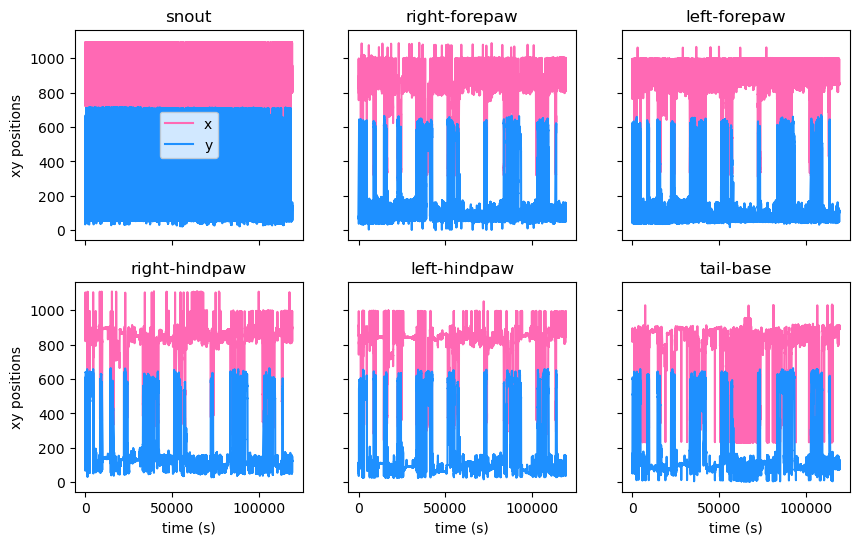

In [11]:
# plot all example files
bodyparts_names = ['snout',
                   'right-forepaw', 'left-forepaw', 
                   'right-hindpaw', 'left-hindpaw', 
                   'tail-base']
cols = 3
rows = int(np.ceil(int(pose.shape[1]/2)/cols))
count = 0
fig, ax = plt.subplots(rows, cols, figsize=(10, 6), sharex=True, sharey=True)
for row in range(rows):
    for col in range(cols):
        try:
            ax[row, col].plot(pose[:, 2*count], c='hotpink', label='x')
            ax[row, col].plot(pose[:, 2*count+1], c='dodgerblue', label='y')
            if col == 0 and row == 0:
                ax[row, col].legend()
            ax[row, col].set_title(bodyparts_names[count])
            if col == 0:
                ax[row, col].set_ylabel('xy positions')

            if row == rows-1:
                ax[row, col].set_xlabel('time (s)')
            count += 1
        except IndexError:
            pass

plt.show()



### save processed pose file 

In [12]:
np.save('../processed_data/pose_video_exp_16.npy', pose)